# K_Mean_CLustering

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
# Make a Model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Importing the data from feature

x = df[['age', 'fare']]
#x.age.fillna(value=x['age'].mean()), inplace= True
x['age'] = x['age'].fillna(x['age'].mean())


# scaled data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform clustering

model = KMeans(n_clusters=5)
model.fit(x_scaled)

# Assign cluster label of data
df['cluster']= model.labels_

C:\Users\ALR\AppData\Local\Temp\ipykernel_10644\3437521884.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [118]:
df['cluster'].unique()

array([0, 1, 2, 4, 3])

<function matplotlib.pyplot.show(close=None, block=None)>

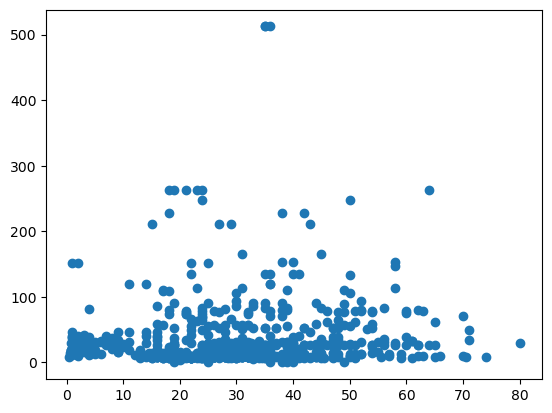

In [119]:
plt.scatter(df['age'], df['fare'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

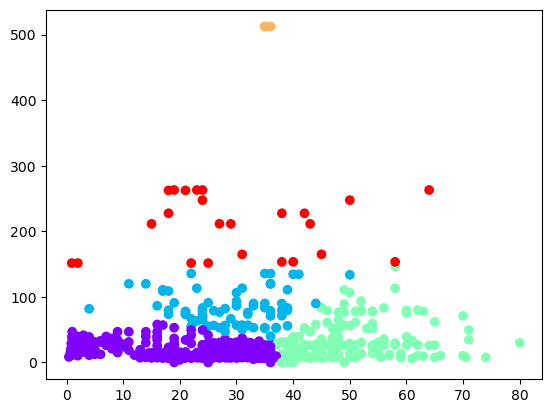

In [120]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap= 'rainbow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

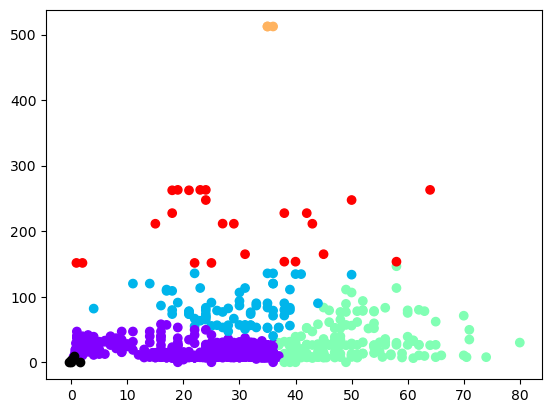

In [121]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap= 'rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

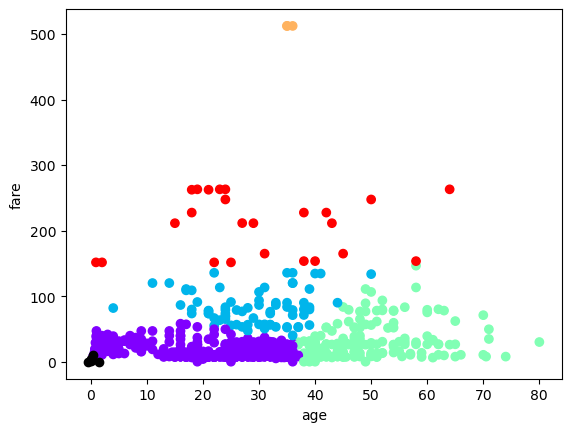

In [122]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap= 'rainbow')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='black')
plt.xlabel('age')
plt.ylabel('fare')

plt.show

In [123]:
import plotly.express as px

fig = px.scatter(df, x='age', y='fare', color= 'cluster')
fig.show()

In [124]:
import plotly.express as px

fig = px.scatter_3d(df, x='age', y='fare',z='pclass', color= 'cluster')
fig.show()

In [125]:
fig =px.parallel_categories(df, color='cluster', title='titanic clusters')
fig.show()

In [126]:
fig =px.parallel_coordinates(df, color='cluster', title='titanic clusters')
fig.show()

In [144]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [145]:
# Saving the model
import joblib
joblib.dump(model, 'kmean_clustering.joblib')

['kmean_clustering.joblib']

In [146]:
# load the model
model_loaded =joblib.load('kmean_clustering.joblib')


In [147]:
import seaborn as sns
df_1 = sns.load_dataset('tips')
df_1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [148]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [150]:
x= df_1.drop(columns = ['sex'])
x= df_1['sex']

In [151]:
x.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [152]:
x.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [153]:
x = pd.get_dummies(x, columns=['smoker'], drop_first=True)


In [154]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['smoker'])
df_1['smoker'] = le.transform(df_1['smoker'])

In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['day'])
df_1['day'] = le.transform(df_1['day'])

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df_1['time'])
df_1['time'] = le.transform(df_1['time'])

In [159]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [160]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(x,y)

In [161]:
joblib.dump(model, 'tips_model.joblib')

['tips_model.joblib']

In [162]:
joblib.load('tips_model.joblib')

DecisionTreeClassifier()

In [166]:
import pickle
# save a model in pickel
with open('model.pkl', 'wb') as f:
    pickle.dump(model,f)
    
print("model.saved successfully.")


model.saved successfully.


In [1]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


# How to Install Tensorflow

In [7]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [6]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
# import tencerflow as tf

# pip install tensorflow --timeout 1000

# python -c "import tensorflow as tf; print(tf.__version__)"

